# Import ~ Seed 선언

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts # sklearn 0.18.1
from sklearn.model_selection import GridSearchCV # sklearn 0.18.1
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Input
from keras.optimizers import Adam
from keras import initializers
from tqdm import tqdm

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import make_scorer, matthews_corrcoef

import os
from time import time
from __future__ import division
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Keras 가 Tensorflow 를 벡엔드로 사용할 수 있도록 설정합니다.
os.environ["KERAS_BACKEND"] = "tensorflow"

# 실험을 재현하고 동일한 결과를 얻을 수 있는지 확인하기 위해 seed 를 설정합니다.
seed = 2019
np.random.seed(seed)
tf.set_random_seed(seed)

# Data Preprocessing

## 데이터셋 불러오기

In [4]:
# 데이터셋 로드
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"
secom = pd.read_csv(url, header=None, delim_whitespace=True)
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"
y = pd.read_csv(url, header=None, usecols=[0], squeeze=True, delim_whitespace=True) 
# delim_whitespace = True : 빈 공간(' ')을 구분자로 인식하고 데이터 읽어옴
# squeeze 만약 컬럼 하나만 읽어오면 데이터 구조를 Series로 읽어옴

In [5]:
print(type(secom)) # 데이터 구조: DataFrame
print(secom.shape) # 1567개의 인스턴스 590개의 속성
secom

<class 'pandas.core.frame.DataFrame'>
(1567, 590)


,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,...,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,-0.0270,...,NaN,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077
7,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,0.0157,...,0.0063,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310
8,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,0.0111,...,0.0045,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525
9,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,0.0159,...,0.0073,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294


In [6]:
print('The dataset has {} observations/rows and {} variables/columns.'.format(secom.shape[0], secom.shape[1]))
print('The majority class has {} observations, minority class {}.'.format(y[y == -1].size, y[y == 1].size))
print('The dataset is imbalanced. The ratio of majority class to minority class is {%.2f}:1.' % (float(y[y == -1].size/y[y == 1].size)))

The dataset has 1567 observations/rows and 590 variables/columns.
The majority class has 1463 observations, minority class 104.
The dataset is imbalanced. The ratio of majority class to minority class is {14.07}:1.


## 결측치 확인

In [7]:
# 결측치를 가지고 있는 컬럼이 몇 개 인지 확인하는 코드

nmv = secom.dropna(axis=1) # 열을 기준으로 NaN 값이 존재하면 그 열을 삭제하고 반환
print('No. of columns after removing columns with missing data: {}'.format(nmv.shape[1]))

nmv = secom.dropna(axis=0) # 행을 기준으로 NaN 값이 존재하면 그 열을 삭제하고 반환
print('No. of rows after removing rows with missing data: {}'.format(nmv.shape[0]))

del nmv # nmv 변수는 오류 방지를 위해 확인 후 바로 삭제

No. of columns after removing columns with missing data: 52
No. of rows after removing rows with missing data: 0


## 상수 값을 가지는 열 제거

In [8]:
dropthese = [i for i in range(590) if secom[i].std() == 0]
secom_categorical = secom.drop(dropthese, axis = 1)
print(secom_categorical.shape)
secom_categorical.head()

print('There are {} columns which have identical values recorded. We will drop these.'.format(len(dropthese)))
print('The data set now has {} columns.'.format(secom_categorical.shape[1]))

(1567, 474)
There are 116 columns which have identical values recorded. We will drop these.
The data set now has 474 columns.


## 200개 결측치 이상이면 제거

In [40]:
m = list(map(lambda x: sum(secom[x].isnull()), range(secom_categorical.shape[1]))) # sum(secom[0].isnull()) : x에 해당하는 컬럼에 결측치를 합친 숫자
m_200thresh = list(filter(lambda i: (m[i] > 200), range(secom_categorical.shape[1])))
print('The number of columns with more than 200 missing values: {}'.format(len(m_200thresh)))

The number of columns with more than 200 missing values: 23


In [41]:
# 200개 이상의 결측치가 있는 열을 지워버림
secom_200 = secom_categorical.drop(m_200thresh, axis=1)
print('No. of columns after dropping columns with more than 200 missing entries: {}'.format(secom_200.shape[1]))
print(secom_200.shape)
secom_200.head()

No. of columns after dropping columns with more than 200 missing entries: 451
(1567, 451)


,0,1,2,3,4,6,7,8,9,10,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [42]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(secom_200, y, test_size = 0.2)

In [43]:
# fill_NaN_by_Gaussian 함수를 적용하기 위해 데이터 형변환 (ndarray -> DataFrame)
df_X2_train = pd.DataFrame(X2_train)
df_X2_test = pd.DataFrame(X2_test)
print(df_X2_train.shape)
print(df_X2_test.shape)

(1253, 451)
(314, 451)


In [44]:
def fill_NaN_by_Gaussian(df_X2_train, df_X2_test) :
      
    """결측치를 해당 열의 가우시안 분포를 따르는 난수로 대체하는 함수이다.
       단, test셋의 각 열은 train셋의 각 열의 가우시안 분포를 따른다고 가정한다.
       따라서, test셋은 train셋의 mean, std를 사용한다.                      """
    
    for column in df_X2_train.columns.values : 
        
        mean = df_X2_train[column].mean()
        std = df_X2_train[column].std()
            
        X2_train_NaN_size = sum(df_X2_train[column].isnull())
        X2_test_NaN_size = sum(df_X2_test[column].isnull())
          
        df_X2_train.loc[df_X2_train[column].isnull(), column] = np.random.normal(mean, std, size = X2_train_NaN_size)            
        df_X2_test.loc[df_X2_test[column].isnull(), column] = np.random.normal(mean, std, size = X2_test_NaN_size)

    return (df_X2_train, df_X2_test)
                          
                          
# main
df_X2_train, df_X2_test = fill_NaN_by_Gaussian(df_X2_train, df_X2_test)
print(df_X2_train.shape)       
print(df_X2_test.shape)

(1253, 451)
(314, 451)


In [45]:
# 표준 정규 분포로 Normalization 
# train 데이터의 각 열에 적용한 평균과 표준편차를 test 데이터의 각 열에 동일하게 적용함
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_scale_parameters = scaler.fit(df_X2_train.values) # train 데이터의 평균과 표준편차로 파라미터를 피팅한 후 저장, test 데이터에도 똑같은 파라미터를 적용하기 위함

scaled_X2_train= std_scale_parameters.transform(df_X2_train) # [n_samples, n_features]의 크기로 반환, [1253,474]
scaled_X2_test= std_scale_parameters.transform(df_X2_test) # [n_samples, n_features]의 크기로 반환, [314,474]

scaled_df_X2_train = pd.DataFrame(scaled_X2_train, index = df_X2_train.index, columns = df_X2_train.columns) # 데이터 프레임으로 변환, 기존의 index, columns 사용
scaled_df_X2_test = pd.DataFrame(scaled_X2_test, index =df_X2_test.index, columns = df_X2_test.columns) # 데이터 프레임으로 변환, 기존의 index, columns 사용

# print(std_scale_parameters.mean_): 평균
# print(std_scale_parameters.var_): 분산
# print(std_scale_parameters.scale_): 표준편차

# print(std_scale_parameters.mean_.size): n_features, 474개
# print(std_scale_parameters.var_.size): n_features, 474개
# print(std_scale_parameters.scale_.size): n_features, 474개

In [46]:
print(scaled_df_X2_train.shape)
scaled_df_X2_train.head()    

print(scaled_df_X2_test.shape)
scaled_df_X2_test.head()    

(1253, 451)
(314, 451)


,0,1,2,3,4,6,7,8,9,10,...,580,581,582,583,584,585,586,587,588,589
488,0.986810,0.690802,-0.772637,0.980677,-0.055400,-0.292487,0.487714,-0.132059,-1.784824,0.016408,...,0.056397,0.023062,0.783208,-0.018358,-0.141172,-0.021489,0.854214,-0.756687,-0.586879,-0.725836
979,2.400391,-0.623470,0.427317,1.335293,-0.062072,-0.670512,0.222935,2.597525,-0.854420,-0.026645,...,0.594701,-0.225137,-1.096983,0.134018,0.076731,0.132995,0.198142,0.271816,0.667160,-0.220522
758,0.450828,0.274426,-1.716142,-0.454301,-0.058142,0.237213,0.234447,0.430825,1.611153,-0.435647,...,-0.662785,1.475313,-1.733356,0.049948,-0.068538,0.058704,-0.366577,1.300319,1.025457,0.686699
1476,-0.191059,-0.223849,0.192685,-0.221205,-0.065706,-0.670163,-0.179990,0.009336,5.020422,1.264939,...,-0.057097,-0.132554,0.667504,-0.118191,0.028308,-0.116182,-1.296704,1.901242,2.207836,5.098787
1460,0.517174,0.405466,-0.599182,0.012880,0.302995,-0.362377,-14.029103,0.106292,0.368398,-0.371068,...,0.083430,-0.071859,-0.807723,-0.223278,-0.213807,-0.210900,-0.366577,-0.074870,0.129715,-0.067800


## 데이터셋 분리

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(secom_categorical, y, test_size = 0.2)

In [10]:
# ndarray 
print(X_train.shape) # (1253, 474)
print(X_test.shape) # (314, 474)
print(y_train.shape) # (1253,)
print(y_test.shape) # (314,)

(1253, 474)
(314, 474)
(1253,)
(314,)


## 결측치 파악

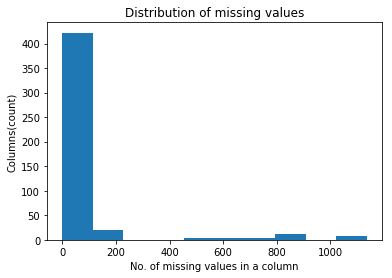

In [11]:
# 결측치 파악을 위한 히스토그램 출력
df_X_train = pd.DataFrame(X_train)
feature_names = df_X_train.columns

m = list((map(lambda i: sum(df_X_train[i].isnull()), feature_names)))
plt.hist(m)
plt.title("Distribution of missing values")
plt.xlabel("No. of missing values in a column")
plt.ylabel("Columns(count)")
plt.show()

In [12]:
# 결측치 파악을 위한 문구 출력
df_X_train = pd.DataFrame(X_train)

criteriaList = [400, 500, 600, 700, 800, 900, 1000]

for criteria in criteriaList :
    columns_filtered = list(filter(lambda i: sum(df_X_train[i].isnull()) > criteria, df_X_train.columns))
    print('The number of columns with more than {:>4d} missing values(about {}%): {:>2d}'.format(criteria, int((criteria/1253)*100), len(columns_filtered)))

The number of columns with more than  400 missing values(about 31%): 32
The number of columns with more than  500 missing values(about 39%): 32
The number of columns with more than  600 missing values(about 47%): 28
The number of columns with more than  700 missing values(about 55%): 24
The number of columns with more than  800 missing values(about 63%): 20
The number of columns with more than  900 missing values(about 71%):  8
The number of columns with more than 1000 missing values(about 79%):  8


## 결측치 채우기 (by Gaussian Distribution)

In [13]:
# fill_NaN_by_Gaussian 함수를 적용하기 위해 데이터 형변환 (ndarray -> DataFrame)
df_X_train = pd.DataFrame(X_train)
df_X_test = pd.DataFrame(X_test)
print(df_X_train.shape)
print(df_X_test.shape)

(1253, 474)
(314, 474)


In [14]:
def fill_NaN_by_Gaussian(df_X_train, df_X_test) :
      
    """결측치를 해당 열의 가우시안 분포를 따르는 난수로 대체하는 함수이다.
       단, test셋의 각 열은 train셋의 각 열의 가우시안 분포를 따른다고 가정한다.
       따라서, test셋은 train셋의 mean, std를 사용한다.                      """
    
    for column in df_X_train.columns.values : 
        
        mean = df_X_train[column].mean()
        std = df_X_train[column].std()
            
        X_train_NaN_size = sum(df_X_train[column].isnull())
        X_test_NaN_size = sum(df_X_test[column].isnull())
          
        df_X_train.loc[df_X_train[column].isnull(), column] = np.random.normal(mean, std, size = X_train_NaN_size)            
        df_X_test.loc[df_X_test[column].isnull(), column] = np.random.normal(mean, std, size = X_test_NaN_size)

    return (df_X_train, df_X_test)
                          
                          
# main
df_X_train, df_X_test = fill_NaN_by_Gaussian(df_X_train, df_X_test)
print(df_X_train.shape)       
print(df_X_test.shape)

(1253, 474)
(314, 474)


In [15]:
# 결측치를 채우고 난 후 정상적으로 결측치가 채워졌는지 재확인하는 코드

# df_X_train
nmv = df_X_train.dropna(axis=1) # 열을 기준으로 NaN 값이 존재하면 그 열을 삭제하고 반환
print('No. of columns after removing columns with missing data: {}'.format(nmv.shape[1]))

nmv = df_X_train.dropna(axis=0) # 행을 기준으로 NaN 값이 존재하면 그 열을 삭제하고 반환
print('No. of rows after removing rows with missing data: {}'.format(nmv.shape[0]))

del nmv  # nmv 변수는 오류 방지를 위해 확인 후 바로 삭제

# df_X_test
nmv = df_X_test.dropna(axis=1) # 열을 기준으로 NaN 값이 존재하면 그 열을 삭제하고 반환
print('No. of columns after removing columns with missing data: {}'.format(nmv.shape[1]))

nmv = df_X_test.dropna(axis=0) # 행을 기준으로 NaN 값이 존재하면 그 열을 삭제하고 반환
print('No. of rows after removing rows with missing data: {}'.format(nmv.shape[0]))

del nmv  # nmv 변수는 오류 방지를 위해 확인 후 바로 삭제

No. of columns after removing columns with missing data: 474
No. of rows after removing rows with missing data: 1253
No. of columns after removing columns with missing data: 474
No. of rows after removing rows with missing data: 314


## Standardize 

-  std_scale = preprocessing.StandardScaler().fit(X_train)

   X_train = std_scale.transform(X_train)

   X_test = std_scale.transform(X_test)
   

-  from sklearn.preprocessing import StandardScaler
   
   scaled_features = StandardScaler().fit_transform(df.values)
   
   ~ (생략) ~
   
   scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
   
   
-  fit_transform(X, y=None, **fit_params)
  
   Fit to data, then transform it.

   Parameters:	
  
   X : numpy array of shape [n_samples, n_features] (Training set.)

   y : numpy array of shape [n_samples] (Target values.)

   Returns:	
  
   X_new : numpy array of shape [n_samples, n_features_new] (Transformed array.)


In [16]:
# 표준 정규 분포로 Normalization 
# train 데이터의 각 열에 적용한 평균과 표준편차를 test 데이터의 각 열에 동일하게 적용함
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_scale_parameters = scaler.fit(df_X_train.values) # train 데이터의 평균과 표준편차로 파라미터를 피팅한 후 저장, test 데이터에도 똑같은 파라미터를 적용하기 위함

scaled_X_train= std_scale_parameters.transform(df_X_train) # [n_samples, n_features]의 크기로 반환, [1253,474]
scaled_X_test= std_scale_parameters.transform(df_X_test) # [n_samples, n_features]의 크기로 반환, [314,474]

scaled_df_X_train = pd.DataFrame(scaled_X_train, index = df_X_train.index, columns = df_X_train.columns) # 데이터 프레임으로 변환, 기존의 index, columns 사용
scaled_df_X_test = pd.DataFrame(scaled_X_test, index =df_X_test.index, columns = df_X_test.columns) # 데이터 프레임으로 변환, 기존의 index, columns 사용

# print(std_scale_parameters.mean_): 평균
# print(std_scale_parameters.var_): 분산
# print(std_scale_parameters.scale_): 표준편차

# print(std_scale_parameters.mean_.size): n_features, 474개
# print(std_scale_parameters.var_.size): n_features, 474개
# print(std_scale_parameters.scale_.size): n_features, 474개

In [17]:
print(scaled_df_X_train.shape)
scaled_df_X_train.head()    

(1253, 474)


,0,1,2,3,4,6,7,8,9,10,...,580,581,582,583,584,585,586,587,588,589
1089,0.602322,-0.400285,0.950564,4.886215,-0.045986,-2.190411,0.230697,-0.358783,1.121164,-0.689363,...,-0.232675,-0.945351,1.911900,-0.216286,-0.190221,-0.214762,-0.421097,0.088563,-0.130543,0.059218
368,-1.068769,0.979995,-0.436840,-0.984440,-0.052737,0.341591,0.000254,0.561953,0.303079,1.475667,...,-1.484362,0.613374,-0.590950,0.151672,0.052051,0.145533,-1.356820,0.181532,0.401566,2.980367
624,-0.347026,-0.096745,0.039670,-1.136098,-0.050593,0.846917,-0.091924,0.911996,-0.099366,0.215425,...,0.083727,0.438684,-2.004325,-0.153208,-0.165994,-0.138880,0.103230,-0.178722,-0.024121,-0.365486
968,-0.990243,-0.406249,-0.933659,-0.427573,-0.052785,0.030972,-0.080401,-0.753773,1.015605,-1.206386,...,1.348161,-0.836682,0.675197,-0.263595,-0.238675,-0.256171,0.038698,-0.887607,-0.946443,-0.624594
924,1.035909,-1.290776,3.905145,2.117196,-0.055901,-1.735562,-0.679553,2.009796,1.701740,1.346411,...,-1.195157,-0.784323,2.530251,-0.205773,-0.165994,-0.209870,-0.493696,-1.352451,-1.265708,-0.721971


In [18]:
print(scaled_df_X_test.shape)
scaled_df_X_test.head()

(314, 474)


,0,1,2,3,4,6,7,8,9,10,...,580,581,582,583,584,585,586,587,588,589
689,0.144543,-2.250101,-0.700481,-1.145942,-0.053239,0.911694,-0.068879,-0.529038,0.553782,-0.624736,...,-0.443273,-0.311094,-0.502615,-0.205773,-0.093312,-0.196050,-0.485630,-0.597080,-0.449808,-0.281106
1143,0.298488,-0.489371,-0.721166,-0.575257,-0.060760,0.399736,-0.161056,-0.554916,-0.224718,-0.226198,...,-0.025330,0.140341,0.262963,-0.300391,-0.262902,-0.290922,0.603358,-0.794639,-0.910969,-0.698212
1122,-1.069445,1.020500,2.591456,1.652048,-0.053957,-1.175580,-0.230189,-0.805531,-0.112561,-0.075400,...,-1.031704,-0.735681,-1.120966,0.172698,0.124732,0.169718,0.264562,-0.899229,-1.088338,-0.676655
756,-0.753581,0.116963,0.375143,0.385662,-0.057839,0.793660,0.034820,0.726759,-1.451846,1.087900,...,-2.475898,-0.075965,-0.649841,0.020258,-0.044858,0.023073,-0.364631,1.297155,1.004622,0.653497
1026,-0.014133,0.730131,0.885877,1.487390,-0.053222,-0.850110,0.219174,-0.285233,-0.033392,0.333910,...,0.186703,0.795215,-1.297638,-0.048077,-0.020631,-0.038939,-0.767960,-0.480870,-0.378860,0.028609


## Import and Apply PCA

In [19]:
# scaled_X_train
# scaled_X_test

In [20]:
# 몇 개의 주성분을 사용해야 하는지 알아보기 위해 작성한 코드
from sklearn.decomposition import PCA

varianceList = [0.80, 0.85, 0.9, 0.95, 0.99, 1]

for ratio in varianceList :
    pca = PCA(ratio)
    pca.fit(scaled_X_train)
    if ratio == 1 :
        print("Choose {:3d} eigenvectors which explain {}% of the variance.".format(474, (pca.n_components)*100))
    else :
        print("Choose {:3d} eigenvectors which explain {:>3d}% of the variance.".format(pca.n_components_, int(pca.n_components*100)))
    del pca

Choose  99 eigenvectors which explain  80% of the variance.
Choose 120 eigenvectors which explain  85% of the variance.
Choose 148 eigenvectors which explain  90% of the variance.
Choose 187 eigenvectors which explain  95% of the variance.
Choose 252 eigenvectors which explain  99% of the variance.
Choose 474 eigenvectors which explain 100% of the variance.


In [21]:
# PCA 인스턴스 객체를 생성.
pca = PCA(0.9)

# 생성된 PCA 인스턴스 객체에 scaled_df_X_train를 Fitting.
# 주의: fit은 오직 scaled_df_X_train에만 적용.
# 동일한 파라미터를 scaled_df_X_test에 적용하기 위함.
pca.fit(scaled_df_X_train)

# transform하게 되면  ndarray로 반환하기 때문에 별도의 DataFrame 형변환 필요.
X_train_after_PCA = pca.transform(scaled_df_X_train)
X_test_after_PCA = pca.transform(scaled_df_X_test)

In [22]:
# PCA 수행 후의 X_train을 DataFrame으로 형변환 
df_X_train_after_PCA = pd.DataFrame(data=X_train_after_PCA, index=scaled_df_X_train.index)
print(df_X_train_after_PCA.shape)
df_X_train_after_PCA.head()

(1253, 148)


,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
1089,-0.332018,-2.057506,-1.226085,1.611808,-2.077943,-0.159129,0.578070,-1.111778,1.602686,-1.352571,...,-0.686919,0.306410,-0.352266,-0.008098,-0.026194,-0.361902,1.887244,0.067386,0.607784,-0.946845
368,-0.783796,1.653026,2.205910,-4.892211,-3.028038,0.210411,0.755727,2.004130,-0.171967,1.584698,...,-0.669402,-0.459221,-0.404910,-0.678694,0.880505,0.150575,0.655743,0.301612,1.591457,2.519833
624,-1.287391,0.017999,1.012086,-1.147308,4.787203,-5.155231,-0.271568,-0.885882,-0.306018,0.293325,...,0.111204,0.982265,-0.504079,-0.971246,-0.680505,-0.263726,-1.834685,1.599151,-0.215779,0.280025
968,0.404579,-3.170590,0.952006,-0.716703,-2.337343,3.554272,-3.111778,0.599583,-0.974178,-1.176240,...,-0.914054,0.354138,0.523755,0.045750,0.565897,0.495189,-0.080239,0.428933,-0.702502,-0.620068
924,-1.456878,-1.206289,0.030340,-3.110879,-2.019240,2.345791,-4.421294,0.958067,0.336076,1.567546,...,0.029454,0.471734,-1.863344,1.051160,-0.468286,-1.297647,-1.319754,-0.978770,0.697381,0.503612


In [23]:
# PCA 수행 후의 X_test을 DataFrame으로 형변환 
df_X_test_after_PCA = pd.DataFrame(data=X_test_after_PCA, index=scaled_df_X_test.index)
print(df_X_test_after_PCA.shape)
df_X_test_after_PCA.head()

(314, 148)


,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
689,0.588418,2.826271,1.777955,-5.198216,-0.121761,-1.536567,-1.931667,-0.656439,2.057914,3.501303,...,1.822095,1.209375,-2.152767,0.331883,-1.451014,1.665561,-0.266249,1.873397,0.439576,-1.174359
1143,-1.793119,-1.919239,-0.945689,2.523886,0.941599,-0.190106,-0.332522,4.116530,-1.520894,-0.857554,...,0.957091,-0.048625,-0.255725,0.738226,-0.102263,-0.701687,0.713309,-0.231460,0.214076,0.879062
1122,-0.404272,-1.519349,-1.202069,2.145298,-1.643274,0.198119,4.285244,0.366744,1.614904,0.081766,...,-0.202212,0.039654,-0.139380,0.109584,1.123391,0.776699,-0.477150,0.652354,0.273254,-0.191869
756,-1.158042,0.999865,0.265809,-1.618297,-0.000985,-0.929367,5.887073,-0.147558,-1.392151,-1.824958,...,0.737106,-0.615100,0.779919,1.101439,-1.936787,-0.535669,-0.115191,0.038611,1.230407,1.018329
1026,0.306523,-3.495130,-1.950295,1.354851,-2.760464,0.951852,-2.060778,0.288817,-1.159985,-0.971792,...,-0.066171,0.428907,-0.894744,-2.222842,0.047831,0.024728,0.503889,1.636606,-0.428193,-1.332297


## 소수 클래스 추출

In [24]:
# 소수 클래스 데이터 프레임을 만들기 위해 y_train을 데이터 프레임으로 변환
df_y_train = y_train.to_frame()
df_y_train.columns = [590]
print(df_y_train.shape)
df_y_train.head()

(1253, 1)


,590
1089,-1
368,1
624,-1
968,-1
924,1


In [25]:
# df_train_after_preprocessing: 전처리가 끝난 train data
df_train_after_preprocessing = df_X_train_after_PCA.join(df_y_train, how ='left')
print(df_train_after_preprocessing.shape)
df_train_after_preprocessing.head()

(1253, 149)


,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,590
1089,-0.332018,-2.057506,-1.226085,1.611808,-2.077943,-0.159129,0.578070,-1.111778,1.602686,-1.352571,...,0.306410,-0.352266,-0.008098,-0.026194,-0.361902,1.887244,0.067386,0.607784,-0.946845,-1
368,-0.783796,1.653026,2.205910,-4.892211,-3.028038,0.210411,0.755727,2.004130,-0.171967,1.584698,...,-0.459221,-0.404910,-0.678694,0.880505,0.150575,0.655743,0.301612,1.591457,2.519833,1
624,-1.287391,0.017999,1.012086,-1.147308,4.787203,-5.155231,-0.271568,-0.885882,-0.306018,0.293325,...,0.982265,-0.504079,-0.971246,-0.680505,-0.263726,-1.834685,1.599151,-0.215779,0.280025,-1
968,0.404579,-3.170590,0.952006,-0.716703,-2.337343,3.554272,-3.111778,0.599583,-0.974178,-1.176240,...,0.354138,0.523755,0.045750,0.565897,0.495189,-0.080239,0.428933,-0.702502,-0.620068,-1
924,-1.456878,-1.206289,0.030340,-3.110879,-2.019240,2.345791,-4.421294,0.958067,0.336076,1.567546,...,0.471734,-1.863344,1.051160,-0.468286,-1.297647,-1.319754,-0.978770,0.697381,0.503612,1


In [26]:
# df_train_after_preprocessing에서 소수 클래스만 추출하여 데이터 프레임화
df_minority_class = df_train_after_preprocessing.loc[df_train_after_preprocessing[590]==1]
print(df_minority_class.shape)
df_minority_class.head()

(79, 149)


,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,590
368,-0.783796,1.653026,2.205910,-4.892211,-3.028038,0.210411,0.755727,2.004130,-0.171967,1.584698,...,-0.459221,-0.404910,-0.678694,0.880505,0.150575,0.655743,0.301612,1.591457,2.519833,1
924,-1.456878,-1.206289,0.030340,-3.110879,-2.019240,2.345791,-4.421294,0.958067,0.336076,1.567546,...,0.471734,-1.863344,1.051160,-0.468286,-1.297647,-1.319754,-0.978770,0.697381,0.503612,1
58,-2.001841,20.423632,-5.275660,5.911742,1.227928,0.964218,-0.486156,-2.189339,-0.169805,-0.577534,...,-1.081795,-0.732248,-0.387245,-2.778289,0.169065,0.214028,-1.930064,-1.060367,-1.516346,1
795,3.402703,-1.766658,0.206569,1.645709,-0.851760,0.843244,-3.003215,-1.002362,-1.046139,-2.688018,...,-0.895791,-0.065762,0.021991,1.102444,-0.082256,0.992829,1.299734,-0.732798,-0.000056,1
327,-1.611193,1.616621,4.334248,-4.772449,0.755788,2.066184,-0.781027,1.540069,-0.674228,-2.192098,...,-0.200277,-0.030430,0.939705,-0.117340,0.416460,-0.702390,1.070303,-0.354489,0.506086,1


## 중간 정리 (변수)

(secom, y): 세콤 데이터셋을 처음 불러올 때 

secom_categorical: secom에서 상수값을 제거 

(X_train, X_test, y_train, y_test): secom_categorical과 y를 훈련셋과 테스트셋으로 8:2로 분리

df_X_train: X_train을 데이터 프레임으로 변환 후 결측치를 가우시안 분포를 따르는 난수로 채움 

df_X_test: X_test을 데이터 프레임으로 변환 후 결측치를 가우시안 분포를 따르는 난수로 채움

scaled_df_X_train: df_X_train에서 각 열의 데이터가 표준 정규분포를 따르도록 Normalization 수행

scaled_df_X_test: df_X_test에서  각 열의 데이터가 표준 정규분포를 따르도록 Normalization 수행

df_y_train:y_train을 데이터 프레임으로 변환

df_train_after_preprocessing: scaled_df_X_train + df_y_train 

df_minority_class: df_train_after_preprocessing에서 소수 클래스만 추출하여 데이터 프레임으로 변환